<a href="https://colab.research.google.com/github/anjali-ds-03/Deep-Learning/blob/main/Intrusion_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv('Train_data.csv')
test_data=pd.read_csv('Test_data.csv')

In [ ]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:

test_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train_data.duplicated().values.any()

np.False_

In [ ]:
test_data.duplicated().values.any()

np.True_

In [ ]:
test_data.duplicated().values.sum()

np.int64(57)

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cat_features=train_data.select_dtypes(include='object')
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

<Axes: xlabel='class', ylabel='count'>

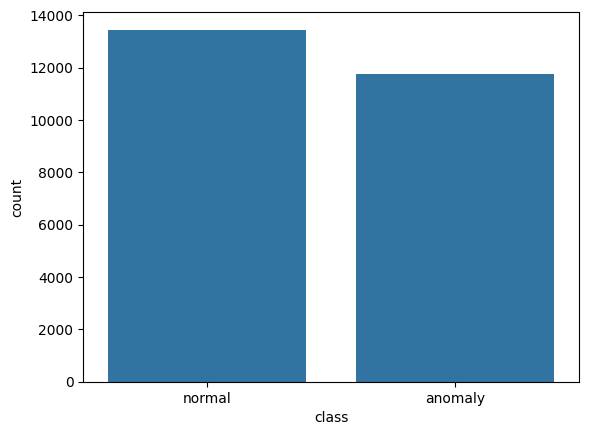

In [ ]:
sns.countplot(data=train_data, x='class')

In [ ]:
train_data['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


<Axes: xlabel='protocol_type', ylabel='count'>

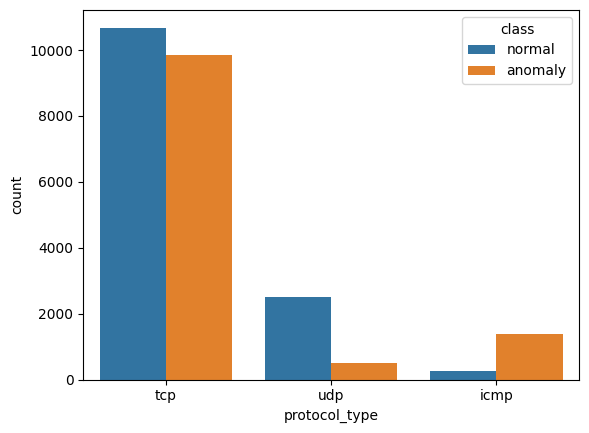

In [ ]:
sns.countplot(data=train_data, x='protocol_type', hue='class')

<Axes: xlabel='flag', ylabel='count'>

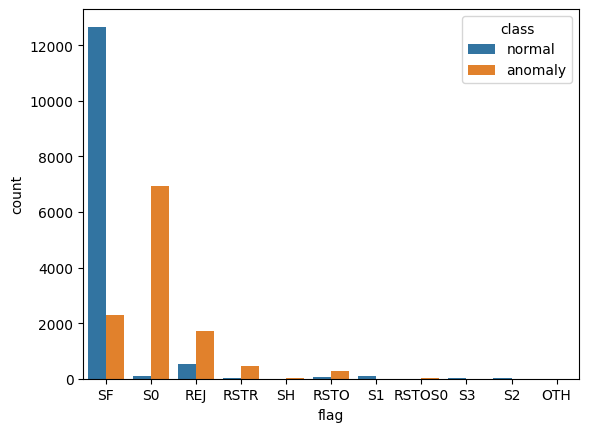

In [ ]:
sns.countplot(data=train_data, x='flag', hue='class')

In [ ]:
labels={'normal':0, 'anomaly':1}
train_data['labels']=train_data['class'].map(labels)


In [ ]:
train_data[['class', 'labels']]

,class,labels
0,normal,0
1,normal,0
2,anomaly,1
3,normal,0
4,normal,0
...,...,...
25187,anomaly,1
25188,anomaly,1
25189,anomaly,1
25190,anomaly,1


In [ ]:
train_data['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


In [ ]:
num_features=train_data.select_dtypes(exclude='object')
num_features.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [ ]:
num_features.corr()['labels'].sort_values()

,labels
same_srv_rate,-0.749237
dst_host_srv_count,-0.719292
dst_host_same_srv_rate,-0.692212
logged_in,-0.688084
srv_diff_host_rate,-0.120649
is_guest_login,-0.038662
num_access_files,-0.036999
su_attempted,-0.025851
num_root,-0.019753
num_compromised,-0.018620


<Axes: >

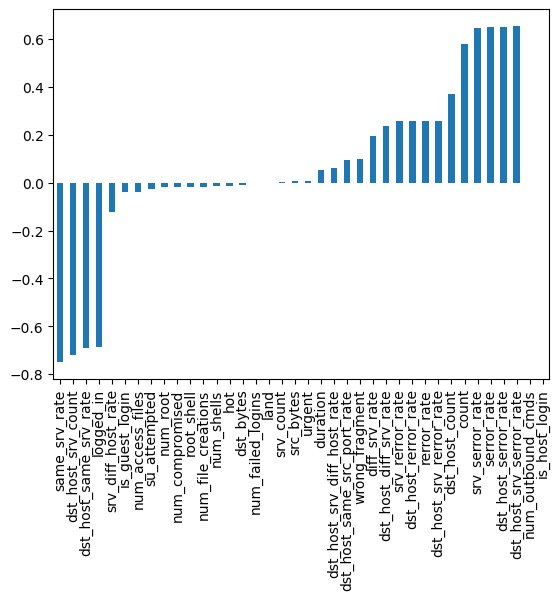

In [ ]:
num_features.corr()['labels'].drop('labels').sort_values().plot(kind='bar')

<Axes: >

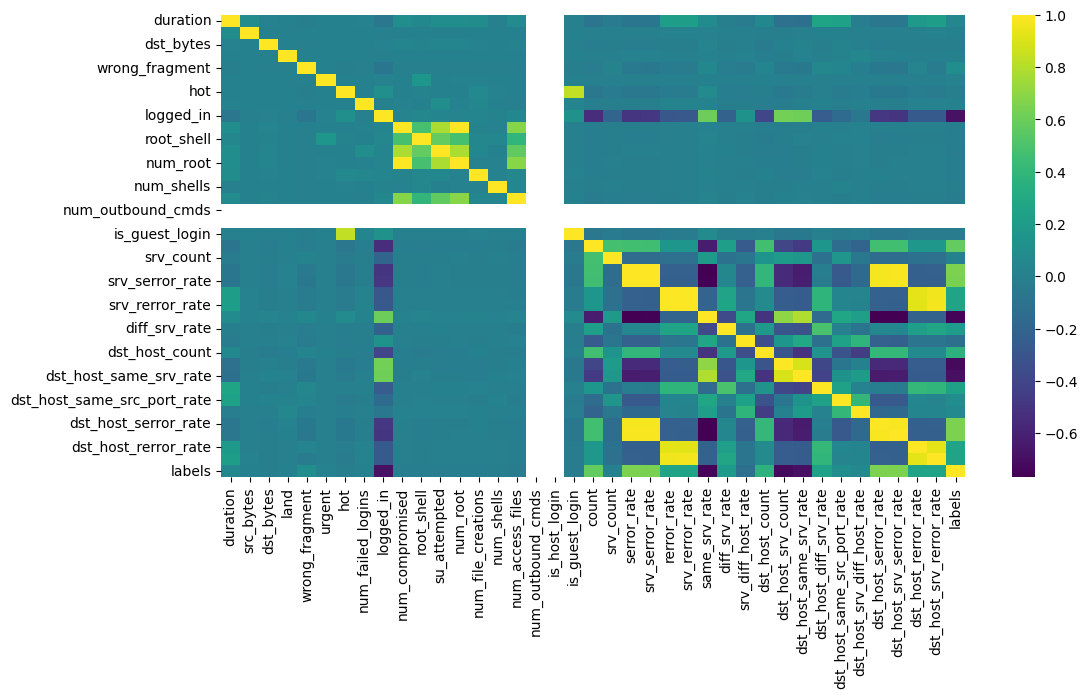

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data=num_features.corr(), cmap='viridis')

In [ ]:
correlation_matrix=num_features.corr()

threshold=0.90

strong_correlations=[]

for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

strong_correlations_df=pd.DataFrame(strong_correlations,columns=['Variable1','Variable2','Correlation'])
strong_correlations_df

,Variable1,Variable2,Correlation
0,num_root,num_compromised,0.998956
1,srv_serror_rate,serror_rate,0.993290
2,srv_rerror_rate,rerror_rate,0.989134
3,dst_host_serror_rate,serror_rate,0.978022
4,dst_host_serror_rate,srv_serror_rate,0.976363
5,dst_host_srv_serror_rate,serror_rate,0.979602
6,dst_host_srv_serror_rate,srv_serror_rate,0.984621
7,dst_host_srv_serror_rate,dst_host_serror_rate,0.984706
8,dst_host_rerror_rate,rerror_rate,0.928992
9,dst_host_rerror_rate,srv_rerror_rate,0.919537


In [ ]:
strong_correlations_list=list(strong_correlations_df['Variable1'])
strong_correlations_list

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
train_data=train_data.drop(strong_correlations_list, axis=1)


In [ ]:
train_data=train_data.drop('service', axis=1)

In [ ]:
train_data.shape

(25192, 35)

In [ ]:
test_data=test_data.drop(strong_correlations_list, axis=1)

In [ ]:
test_data=test_data.drop('service', axis=1)

In [ ]:
test_data.shape

(22544, 33)

In [ ]:
missing_columns=train_data.columns[~train_data.columns.isin(test_data.columns)]
missing_columns_list=missing_columns.tolist()
missing_columns_list

['class', 'labels']

In [ ]:
train_data=train_data.drop('class', axis=1)

In [ ]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [ ]:
train_dummies=pd.get_dummies(train_data[['protocol_type', 'flag']], drop_first=True)
train_dummies

,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,True,False,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
25187,True,False,False,True,False,False,False,False,False,False,False,False
25188,True,False,False,False,False,False,False,False,False,False,True,False
25189,True,False,True,False,False,False,False,False,False,False,False,False
25190,True,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
train_data.drop(['protocol_type', 'flag'], axis=1, inplace=True)
train_data=pd.concat([train_data, train_dummies], axis=1)


In [ ]:
train_data.shape

(25192, 44)

In [ ]:
test_dummies=pd.get_dummies(test_data[['protocol_type', 'flag']], drop_first=True)
test_data.drop(['protocol_type', 'flag'], axis=1, inplace=True)
test_data=pd.concat([test_data, test_dummies], axis=1)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model= LogisticRegression()

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x=train_data.drop('labels', axis=1)
y=train_data['labels']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y ,test_size=0.2, random_state=42)

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2674
           1       0.96      0.95      0.96      2365

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039



In [ ]:
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
ann_model=Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop= EarlyStopping(monitor='val_loss',mode='min', patience=10, verbose=1)

In [ ]:
ann_model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8619 - loss: 0.3338 - val_accuracy: 0.9663 - val_loss: 0.0976
Epoch 2/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9573 - loss: 0.1325 - val_accuracy: 0.9694 - val_loss: 0.0875
Epoch 3/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9633 - loss: 0.1107 - val_accuracy: 0.9722 - val_loss: 0.0771
Epoch 4/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9670 - loss: 0.0979 - val_accuracy: 0.9708 - val_loss: 0.0749
Epoch 5/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9684 - loss: 0.0940 - val_accuracy: 0.9748 - val_loss: 0.0676
Epoch 6/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0805 - val_accuracy: 0.9778 - val_loss: 0.0604
Epoch 7/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9726 - loss: 0.0765 - val_accuracy: 0.9768 - val_loss: 0.0582
Epoch 8/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9723 - loss: 0.0734 - val_accu

<Axes: >

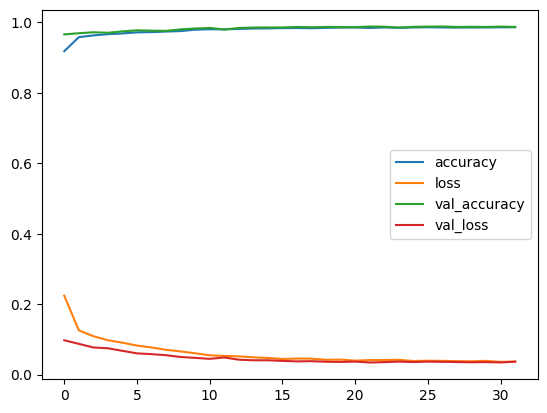

In [ ]:
loss=pd.DataFrame(ann_model.history.history)
loss.plot()

In [ ]:
y_pred=ann_model.predict(x_test)
y_pred=(y_pred>0.8).astype(int)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2674
           1       0.99      0.98      0.99      2365

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [ ]:
x_train=train_data.drop('labels', axis=1).values
y_train=train_data['labels'].values

In [ ]:
x_test=test_data.values

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
ann_model=Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
ann_model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8785 - loss: 0.3064 - val_accuracy: 0.9615 - val_loss: 0.1057
Epoch 2/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9593 - loss: 0.1263 - val_accuracy: 0.9663 - val_loss: 0.0933
Epoch 3/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9647 - loss: 0.1105 - val_accuracy: 0.9671 - val_loss: 0.0816
Epoch 4/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9682 - loss: 0.0943 - val_accuracy: 0.9738 - val_loss: 0.0729
Epoch 5/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0832 - val_accuracy: 0.9736 - val_loss: 0.0695
Epoch 6/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9739 - loss: 0.0795 - val_accuracy: 0.9766 - val_loss: 0.0633
Epoch 7/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9754 - loss: 0.0734 - val_accuracy: 0.9754 - val_loss: 0.0648
Epoch 8/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0753 - val_accu

In [ ]:
test_pred=ann_model.predict(x_test)
test_pred=(test_pred>0.8).astype(int)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
test_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789 (57.77 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,860 (38.52 KB)